# COMPSCI-589 HW3: Random Forest

name: Harry (Haochen) Wang

In [5]:
from evaluationmatrix import *
from utils import *
from decisiontree import *
from randomforest import *
from run import *

In [6]:
housedata, housecategory = importhousedata()
winedata, winecategory = importwinedata()
cancerdata, cancercategory = importcancerdata()
cmcdata,cmccategory = importcmcdata()

parameterofn = [1, 5, 10, 20, 30, 40, 50]  # n of ntrees

def ploter(data, title, xlabel, ylabel, error = None, n = parameterofn):
    plt.errorbar(n, data, yerr=error , fmt = '-o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel) 
    plt.title(title)
    plt.plot(n,data)
    plt.show()

### I. Wine Dataset

In [7]:
wineaccuracy, wineprecision, winerecall, winef1 = [], [], [], []
wineprecisionstd, winerecallstd, winef1std  = [], [] ,[]
for n in parameterofn:
    lists = kfoldcrossvalid(winedata, winecategory, 10, n, 10, 5, 0.01, 'id3', 0.1)[0]
    beta = 1
    a,p0,r0,f0,all = evaluate(lists, 1, beta)
    a,p1,r1,f1,all = evaluate(lists, 2, beta)
    a,p2,r2,f2,all = evaluate(lists, 3, beta)
    p = p0+p1+p2
    r = r0+r1+r2
    f = f0+f1+f2
    wineprecisionstd.append((np.std(p)/2))
    winerecallstd.append((np.std(r)/2))
    winef1std.append((np.std(f)/2))
    acc0, pre0, rec0, fsc0 = meanevaluation(lists, 1, beta)
    acc1, pre1, rec1, fsc1 = meanevaluation(lists, 2, beta)
    acc2, pre2, rec2, fsc2 = meanevaluation(lists, 3, beta)
    acc, pre, rec, fsc = (acc0+acc1+acc2)/3, (pre0+pre1+pre2)/3, (rec0+rec1+rec2)/3, (fsc0+fsc1+fsc2)/3
    wineaccuracy.append(acc)
    wineprecision.append(pre)
    winerecall.append(rec)
    winef1.append(fsc)
    markdownaprf(acc, pre, rec, fsc, beta, n, 'Wine with information gain')


	Result/Stat of 1 trees random forest of Wine with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.937 | 0.92 | 0.91 | 0.909 |
    


	Result/Stat of 5 trees random forest of Wine with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.978 | 0.971 | 0.97 | 0.968 |
    


	Result/Stat of 10 trees random forest of Wine with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.985 | 0.979 | 0.981 | 0.979 |
    


	Result/Stat of 20 trees random forest of Wine with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.977 | 0.971 | 0.97 | 0.967 |
    


	Result/Stat of 30 trees random forest of Wine with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.985 | 0.983 | 0.976 | 0.978 |
    


	Result/Stat of 40 trees random forest of Wine with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.981 | 0.972 | 0.975 | 0.971 |
    


	Result/Stat of 50 trees random forest of Wine with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.981 | 0.976 | 0.974 | 0.973 |
    

Result/Stat of 1 trees random forest of Wine with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.927 | 0.92 | 0.891 | 0.894 |

Result/Stat of 5 trees random forest of Wine with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.974 | 0.969 | 0.957 | 0.96 |

Result/Stat of 10 trees random forest of Wine with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.974 | 0.967 | 0.963 | 0.962 |

Result/Stat of 20 trees random forest of Wine with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.977 | 0.973 | 0.969 | 0.967 |

Result/Stat of 30 trees random forest of Wine with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.977 | 0.97 | 0.968 | 0.967 |

Result/Stat of 40 trees random forest of Wine with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.981 | 0.976 | 0.975 | 0.973 |

Result/Stat of 50 trees random forest of Wine with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.981 | 0.974 | 0.975 | 0.972 |

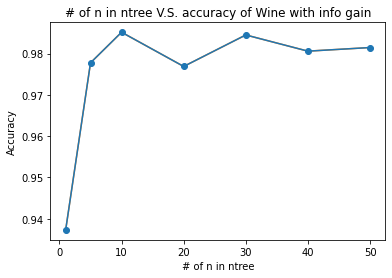

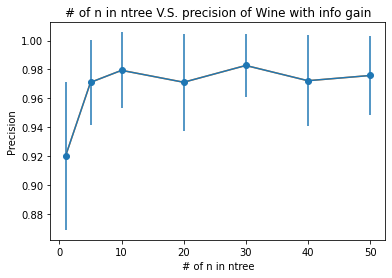

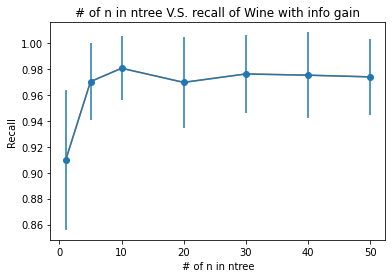

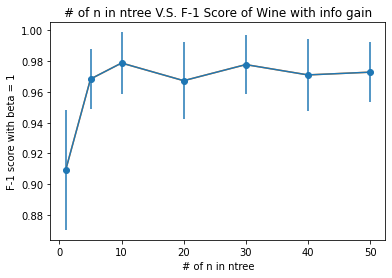

In [8]:
ploter(wineaccuracy, '# of n in ntree V.S. accuracy of Wine with info gain', '# of n in ntree', 'Accuracy')
ploter(wineprecision, '# of n in ntree V.S. precision of Wine with info gain', '# of n in ntree', 'Precision', wineprecisionstd)
ploter(winerecall, '# of n in ntree V.S. recall of Wine with info gain', '# of n in ntree', 'Recall', winerecallstd)
ploter(winef1, '# of n in ntree V.S. F-1 Score of Wine with info gain', '# of n in ntree', 'F-1 score with beta = 1', winef1std)

For this algorithm, here are the parameters I have:

| **k (Fold)** | **max_depth** | **min_size_for_split** | **min_gain** |**bootstrap_ratio** |
| :---: | :---: | :---: | :---: | :---: |
| 10 | 10 | 5 | 0.01 | 0.1 |

The K is the fold value, I just use the recommend k = 10

The max_depth is the maximum depth for the tree, (traverse depth), since there are only 178 instance of data, I just set max_depth to 10 because that won't matter to the algorithm.

The min_size_for_split, say n, is when there are less than 'n' values in the subdata left, I don't do the split anymore. I set it to 5 because we have a small dataset for this.

The min_gain is the minimal gain I need to keep decide. I set it to 0.01 so that's very close to 0 but not 0.

The bootstrap_ratio is the ratio # of instance in training set that got resample in the bagging/bootstrap method. In this model, it's 0.1 so 10% of the data got resampled.


##### (4)
For each metric being evaluated (and for each dataset), discuss which value of ntree you would select if you were to deploy this classifier in real life. Explain your reasoning.


ANSWER:

For the number of n of ntree in the random forest, I would pick n = 20. It's clearly that there are huge improvement in all accuracy, precision and recall (and f1, I will not mention them as frequently since it's the harmonic mean of precision and recall) when n raise from 1 to 5 and 10. However, higher than that, the rate of increasing in [accuracy, precison & recall] is getting slower.

So the gain we have in the [accuracy, precison, recall, f1] is getting slower, while the cost of training the tree is getting larger, so I would pick n = 20, which seems to be a fiiting in the middle of [accuracy, precison & recall] and cost(in time and space)

##### (5)

Discuss (on a high level) which metrics were more directly affected by changing the value of ntree and, more generally, how such changes affected the performance of your algorithm. For instance: was the accuracy of the random forest particularly sensitive to increasing ntree past a given value? Was the F1 score a “harder” metric to optimize, possibly requiring a significant number of trees in the ensemble? Is there a point beyond which adding more trees does not improve performance—or makes the performance worse?

ANSWER:

First, notice that the accuracy, precision, recall and f-1 score might have the same shape, since we need to 

"calculate the average of recall and precision by considering each class as positive once, calculating precision and recall then taking the average overall classes." (I quoted this answer from piazza)

So this actually smooth out the precision and recall curve because we find the precision of all three classes and calculate the arithmetic mean.

For the algorithm, I think it increase the most from n = 1 to n = 5. Actually, I think as long as n = 3, there's going to be a huge leap because instead of one, there are three trees thinking together and come up with a result. (can't be two because there no third voter to decide their disagreements.) 
And as n growth, the rate of increase in the performance decreases. (the rate of change decreases, not the performance decreases). It's like an log curve. I think, there will be some point that adding more trees doesn't improve the performance, might not toward one due to the limit of the algorithm (Maybe for NN performance of 1 is possible). But I don't think, generally speaking, the performance would getting worse at some point: there might be fluctuation, but not huge drops.

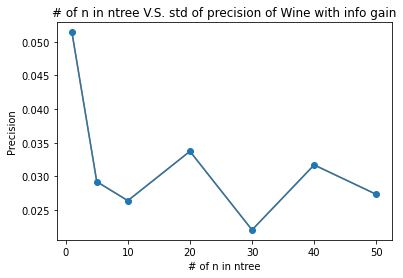

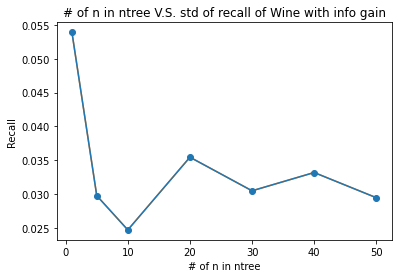

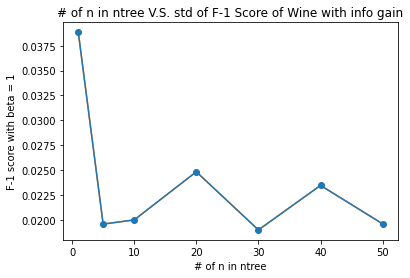

In [9]:
ploter(wineprecisionstd, '# of n in ntree V.S. std of precision of Wine with info gain', '# of n in ntree', 'Precision')
ploter(winerecallstd, '# of n in ntree V.S. std of recall of Wine with info gain', '# of n in ntree', 'Recall')
ploter(winef1std, '# of n in ntree V.S. std of F-1 Score of Wine with info gain', '# of n in ntree', 'F-1 score with beta = 1')

For the F score and so, we can find out that it's almost the same shape of curve as accuracy, since they have similar calculation process the (the harmonic mean of recall and precision; the accuracy is kind of similar to arithmetic mean of those two.)
So F1 score is not a harder matrix to optimize. Notice that the st-dev of std would decrease with more tree, that means for all the k-folds the performance would be more 'stable'

### II. 1984 US Congressional Voting Dataset

In [10]:
houseaccuracy, houseprecision, houserecall, housef1 = [], [], [], []
houseprecisionstd, houserecallstd, housef1std  = [], [] ,[]
for n in parameterofn:
    lists = kfoldcrossvalid(housedata, housecategory, 10, n, 10, 5, 0.01, 'id3', 0.1)[0]
    beta = 1
    a,p0,r0,f0,all = evaluate(lists, 0, beta)
    a,p1,r1,f1,all = evaluate(lists, 1, beta)
    p = p0+p1
    r = r0+r1
    f = f0+f1
    houseprecisionstd.append(np.std(p)/2)
    houserecallstd.append(np.std(r)/2)
    housef1std.append(np.std(f)/2)  
    acc0, pre0, rec0, fsc0 = meanevaluation(lists, 0, beta)
    acc1, pre1, rec1, fsc1 = meanevaluation(lists, 1, beta)
    acc, pre, rec, fsc = (acc0+acc1)/2, (pre0+pre1)/2, (rec0+rec1)/2, (fsc0+fsc1)/2
    houseaccuracy.append(acc)
    houseprecision.append(pre)
    houserecall.append(rec)
    housef1.append(fsc)
    markdownaprf(acc, pre, rec, fsc, beta, n, 'House with information gain')


	Result/Stat of 1 trees random forest of House with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.883 | 0.883 | 0.876 | 0.876 |
    


	Result/Stat of 5 trees random forest of House with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.945 | 0.944 | 0.942 | 0.942 |
    


	Result/Stat of 10 trees random forest of House with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.958 | 0.957 | 0.956 | 0.956 |
    


	Result/Stat of 20 trees random forest of House with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.965 | 0.964 | 0.964 | 0.964 |
    


	Result/Stat of 30 trees random forest of House with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.959 | 0.957 | 0.958 | 0.957 |
    


	Result/Stat of 40 trees random forest of House with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.958 | 0.956 | 0.958 | 0.956 |
    


	Result/Stat of 50 trees random forest of House with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.956 | 0.954 | 0.956 | 0.954 |
    

Result/Stat of 1 trees random forest of House with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.904 | 0.905 | 0.896 | 0.898 |

Result/Stat of 5 trees random forest of House with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.947 | 0.948 | 0.942 | 0.943 |

Result/Stat of 10 trees random forest of House with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.961 | 0.959 | 0.962 | 0.959 |

Result/Stat of 20 trees random forest of House with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.961 | 0.96 | 0.96 | 0.958 |

Result/Stat of 30 trees random forest of House with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.961 | 0.96 | 0.961 | 0.959 |

Result/Stat of 40 trees random forest of House with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.954 | 0.952 | 0.954 | 0.952 |

Result/Stat of 50 trees random forest of House with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.961 | 0.96 | 0.959 | 0.959 |

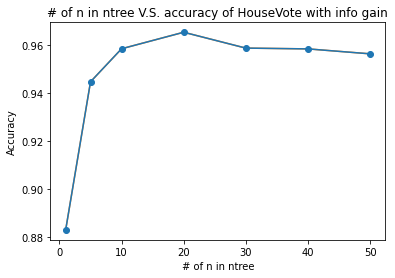

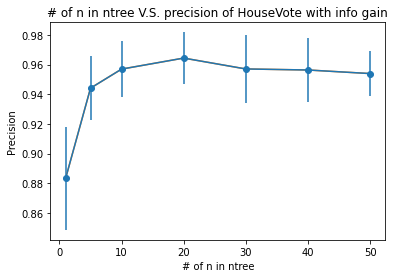

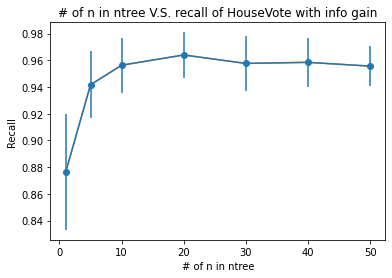

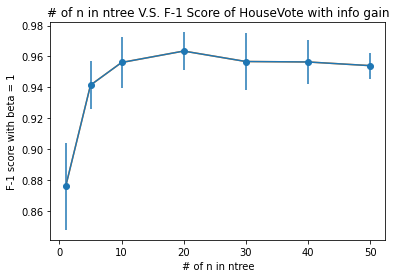

In [11]:
ploter(houseaccuracy, '# of n in ntree V.S. accuracy of HouseVote with info gain', '# of n in ntree', 'Accuracy')
ploter(houseprecision, '# of n in ntree V.S. precision of HouseVote with info gain', '# of n in ntree', 'Precision', houseprecisionstd)
ploter(houserecall, '# of n in ntree V.S. recall of HouseVote with info gain', '# of n in ntree', 'Recall', houserecallstd)
ploter(housef1, '# of n in ntree V.S. F-1 Score of HouseVote with info gain', '# of n in ntree', 'F-1 score with beta = 1', housef1std)

For this algorithm, here are the parameters I have:

| **k (Fold)** | **max_depth** | **min_size_for_split** | **min_gain** |**bootstrap_ratio** |
| :---: | :---: | :---: | :---: | :---: |
| 10 | 10 | 5 | 0.01 | 0.1 |

I use the same setup as the first dataset.

##### (4)

ANSWER: 

I would also pick 10 to 20, for this model and 20 is prefered for the low variance (st_dev). Indeed, I'd pick 19 (or 21), since it's better if it's odd, so that when there is a 10 vs 10 disagreement there could be a tree stanout to determine the prediction.

##### (5)

The performance model is very similar to the previous model. One thing better is that it's faster but that make sence becuase it's a categorical tree.
In these anlysis plots we can see that the rate of change in the performance is getting very close to zero as the # of n of ntree approach around 40-50. So in this case, it's not making sence to adding the value of n to improve. (maybe boosting would work!)


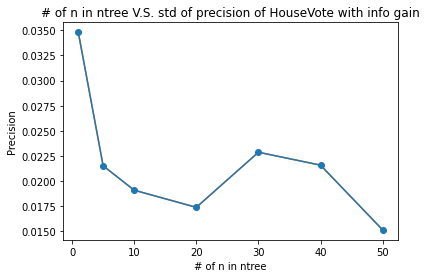

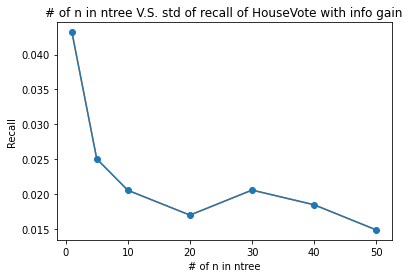

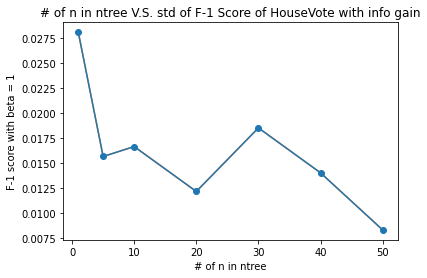

In [12]:
ploter(houseprecisionstd, '# of n in ntree V.S. std of precision of HouseVote with info gain', '# of n in ntree', 'Precision')
ploter(houserecallstd, '# of n in ntree V.S. std of recall of HouseVote with info gain', '# of n in ntree', 'Recall')
ploter(housef1std, '# of n in ntree V.S. std of F-1 Score of HouseVote with info gain', '# of n in ntree', 'F-1 score with beta = 1')

We can see the drop in st_dev as the n growth, but it is slight increase when the n get larger (anyway the growth is less than 0.005 so I guess it's just random error/fluctuation.)

### III. Extra Points

#### (Extra Points #1: 6 Points) 
Reconstruct the same graphs as above, but now using the Gini criterion. You should present the same analyses and graphs mentioned above. Discuss whether (and how) different performance metrics were affected (positively or negatively) by changing the splitting criterion, and explain why you think that was the case.

In [13]:
wineaccuracygini, wineprecisiongini, winerecallgini, winef1gini = [], [], [], []
wineprecisionginistd, winerecallginistd, winef1ginistd  = [], [] ,[]
for n in parameterofn:
    lists = kfoldcrossvalid(winedata, winecategory, 10, n, 10, 5, 0.01, 'gini', 0.1)[0]
    beta = 1
    a,p0,r0,f0,all = evaluate(lists, 1, beta)
    a,p1,r1,f1,all = evaluate(lists, 2, beta)
    a,p2,r2,f2,all = evaluate(lists, 3, beta)
    p = p0+p1+p2
    r = r0+r1+r2
    f = f0+f1+f2
    wineprecisionginistd.append(np.std(p)/2)
    winerecallginistd.append(np.std(r)/2)
    winef1ginistd.append(np.std(f)/2)
    acc0, pre0, rec0, fsc0 = meanevaluation(lists, 1, beta)
    acc1, pre1, rec1, fsc1 = meanevaluation(lists, 2, beta)
    acc2, pre2, rec2, fsc2 = meanevaluation(lists, 3, beta)
    acc, pre, rec, fsc = (acc0+acc1+acc2)/3, (pre0+pre1+pre2)/3, (rec0+rec1+rec2)/3, (fsc0+fsc1+fsc2)/3
    wineaccuracygini.append(acc)
    wineprecisiongini.append(pre)
    winerecallgini.append(rec)
    winef1gini.append(fsc)
    markdownaprf(acc, pre, rec, fsc, beta, n, 'Wine with Gini index')


	Result/Stat of 1 trees random forest of Wine with Gini index:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.93 | 0.913 | 0.897 | 0.896 |
    


	Result/Stat of 5 trees random forest of Wine with Gini index:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.958 | 0.948 | 0.942 | 0.938 |
    


	Result/Stat of 10 trees random forest of Wine with Gini index:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.973 | 0.968 | 0.96 | 0.96 |
    


	Result/Stat of 20 trees random forest of Wine with Gini index:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.98 | 0.973 | 0.974 | 0.972 |
    


	Result/Stat of 30 trees random forest of Wine with Gini index:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.981 | 0.974 | 0.976 | 0.973 |
    


	Result/Stat of 40 trees random forest of Wine with Gini index:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.989 | 0.984 | 0.986 | 0.984 |
    


	Result/Stat of 50 trees random forest of Wine with Gini index:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.981 | 0.976 | 0.973 | 0.972 |
    

Result/Stat of 1 trees random forest of Wine with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.93 | 0.917 | 0.89 | 0.893 |

Result/Stat of 5 trees random forest of Wine with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.962 | 0.955 | 0.942 | 0.944 |

Result/Stat of 10 trees random forest of Wine with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.977 | 0.969 | 0.969 | 0.966 |

Result/Stat of 20 trees random forest of Wine with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.985 | 0.98 | 0.98 | 0.978 |

Result/Stat of 30 trees random forest of Wine with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.977 | 0.972 | 0.969 | 0.967 |

Result/Stat of 40 trees random forest of Wine with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.98 | 0.973 | 0.973 | 0.97 |

Result/Stat of 50 trees random forest of Wine with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.989 | 0.984 | 0.985 | 0.983 |

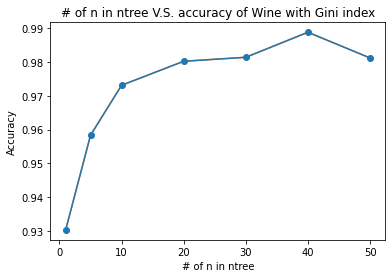

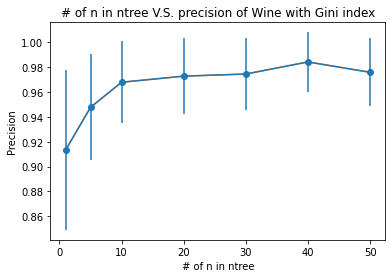

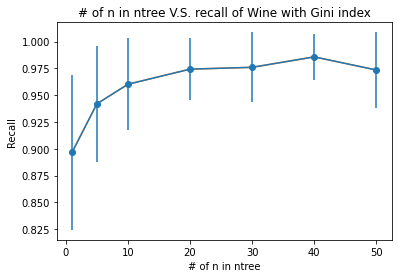

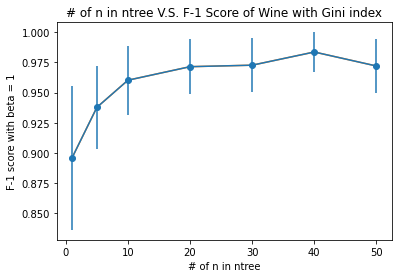

In [14]:
ploter(wineaccuracygini, '# of n in ntree V.S. accuracy of Wine with Gini index', '# of n in ntree', 'Accuracy')
ploter(wineprecisiongini, '# of n in ntree V.S. precision of Wine with Gini index', '# of n in ntree', 'Precision', wineprecisionginistd)
ploter(winerecallgini, '# of n in ntree V.S. recall of Wine with Gini index', '# of n in ntree', 'Recall', winerecallginistd)
ploter(winef1gini, '# of n in ntree V.S. F-1 Score of Wine with Gini index', '# of n in ntree', 'F-1 score with beta = 1', winef1ginistd)

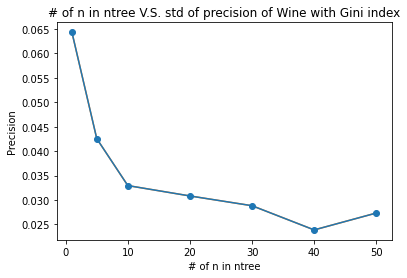

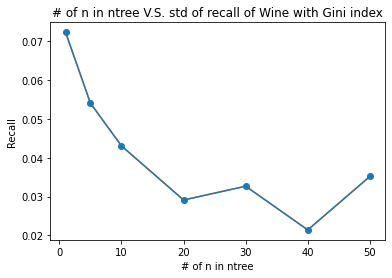

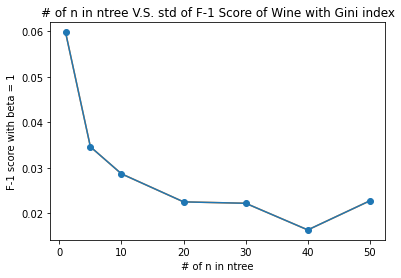

In [15]:
ploter(wineprecisionginistd, '# of n in ntree V.S. std of precision of Wine with Gini index', '# of n in ntree', 'Precision')
ploter(winerecallginistd, '# of n in ntree V.S. std of recall of Wine with Gini index', '# of n in ntree', 'Recall')
ploter(winef1ginistd, '# of n in ntree V.S. std of F-1 Score of Wine with Gini index', '# of n in ntree', 'F-1 score with beta = 1')

In [16]:
houseaccuracygini, houseprecisiongini, houserecallgini, housef1gini = [], [], [], []
houseprecisionginistd, houserecallginistd, housef1ginistd  = [], [] ,[]
for n in parameterofn:
    lists = kfoldcrossvalid(housedata, housecategory, 10, n, 10, 10, 0.01, 'gini', 0.1)[0]
    beta = 1
    a,p0,r0,f0,all = evaluate(lists, 0, beta)
    a,p1,r1,f1,all = evaluate(lists, 1, beta)
    p = p0+p1
    r = r0+r1
    f = f0+f1
    houseprecisionginistd.append(np.std(p)/2)
    houserecallginistd.append(np.std(r)/2)
    housef1ginistd.append(np.std(f)/2)
    acc0, pre0, rec0, fsc0 = meanevaluation(lists, 0, beta)
    acc1, pre1, rec1, fsc1 = meanevaluation(lists, 1, beta)
    acc, pre, rec, fsc = (acc0+acc1)/2, (pre0+pre1)/2, (rec0+rec1)/2, (fsc0+fsc1)/2
    houseaccuracygini.append(acc)
    houseprecisiongini.append(pre)
    houserecallgini.append(rec)
    housef1gini.append(fsc)
    markdownaprf(acc, pre, rec, fsc, beta, n, 'House with Gini index')


	Result/Stat of 1 trees random forest of House with Gini index:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.943 | 0.938 | 0.942 | 0.94 |
    


	Result/Stat of 5 trees random forest of House with Gini index:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.952 | 0.953 | 0.95 | 0.949 |
    


	Result/Stat of 10 trees random forest of House with Gini index:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.954 | 0.952 | 0.951 | 0.951 |
    


	Result/Stat of 20 trees random forest of House with Gini index:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.949 | 0.947 | 0.948 | 0.947 |
    


	Result/Stat of 30 trees random forest of House with Gini index:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.954 | 0.952 | 0.954 | 0.952 |
    


	Result/Stat of 40 trees random forest of House with Gini index:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.959 | 0.956 | 0.958 | 0.957 |
    


	Result/Stat of 50 trees random forest of House with Gini index:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.965 | 0.966 | 0.965 | 0.964 |
    

Result/Stat of 1 trees random forest of House with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.947 | 0.948 | 0.946 | 0.944 |

Result/Stat of 5 trees random forest of House with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.945 | 0.945 | 0.942 | 0.941 |

Result/Stat of 10 trees random forest of House with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.968 | 0.966 | 0.967 | 0.966 |

Result/Stat of 20 trees random forest of House with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.952 | 0.949 | 0.951 | 0.949 |

Result/Stat of 30 trees random forest of House with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.959 | 0.957 | 0.959 | 0.957 |

Result/Stat of 40 trees random forest of House with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.954 | 0.954 | 0.954 | 0.952 |

Result/Stat of 50 trees random forest of House with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.954 | 0.95 | 0.954 | 0.951 |

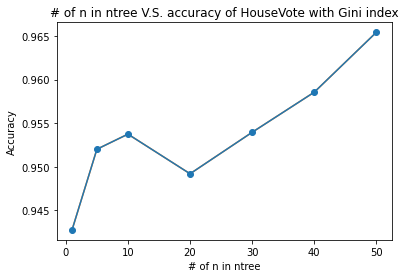

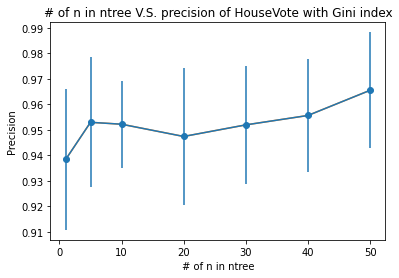

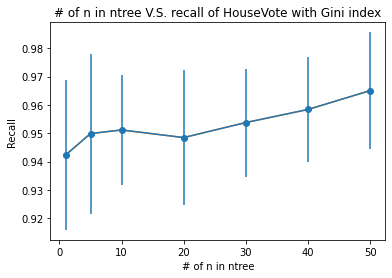

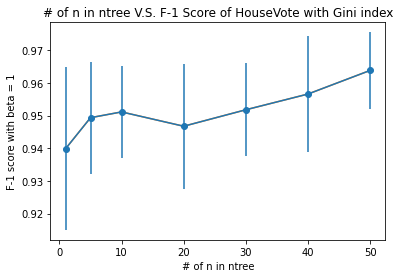

In [17]:
ploter(houseaccuracygini, '# of n in ntree V.S. accuracy of HouseVote with Gini index', '# of n in ntree', 'Accuracy')
ploter(houseprecisiongini, '# of n in ntree V.S. precision of HouseVote with Gini index', '# of n in ntree', 'Precision', houseprecisionginistd)
ploter(houserecallgini, '# of n in ntree V.S. recall of HouseVote with Gini index', '# of n in ntree', 'Recall', houserecallginistd)
ploter(housef1gini, '# of n in ntree V.S. F-1 Score of HouseVote with Gini index', '# of n in ntree', 'F-1 score with beta = 1', housef1ginistd)

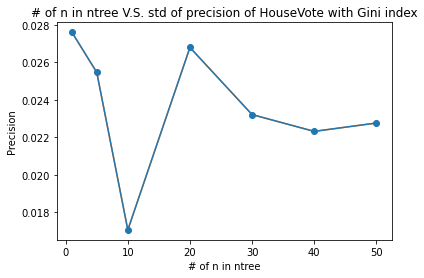

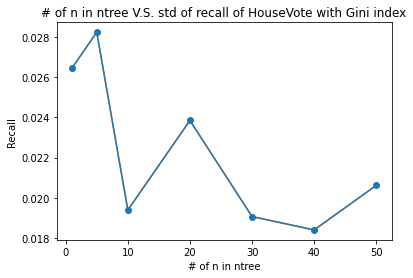

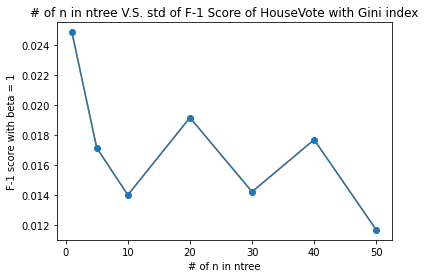

In [18]:
ploter(houseprecisionginistd, '# of n in ntree V.S. std of precision of HouseVote with Gini index', '# of n in ntree', 'Precision')
ploter(houserecallginistd, '# of n in ntree V.S. std of recall of HouseVote with Gini index', '# of n in ntree', 'Recall')
ploter(housef1ginistd, '# of n in ntree V.S. std of F-1 Score of HouseVote with Gini index', '# of n in ntree', 'F-1 score with beta = 1')

ANALYSIS for extra I:

for those two, we are getting similar result on how the performance improves as n changes. 

For the house data, our performance is slightly better (around 96%) but the rate of increase is slower.

For the wine data, the difference between info gain and gini are neglectable.

#### (Extra Points #2: 6 Points) 
Analyze a third dataset: the Breast Cancer Dataset. The goal, here, is to classify whether tissue removed via a biopsy indicates whether a person may or may not have breast cancer. There are 699 instances in this dataset. Each instance is described by 9 numerical attributes, and there are 2 classes. You should present the same analyses and graphs as discussed above. This dataset can be found in the same zip file as the two main datasets.


In [19]:
# canceraccuracy, cancerprecision, cancerrecall, cancerf1 = [], [], [], []
# cancerprecisionstd, cancerrecallstd, cancerf1std  = [], [], []
# for n in parameterofn:
#     lists = kfoldcrossvalid(cancerdata, cancercategory, 10, n, 7, 10, 0.01, 'id3', 0.1)[0]
#     beta = 1
#     a,p,r,f,all = evaluate(lists, 1, beta)
#     cancerprecisionstd.append(np.std(p)/2)
#     cancerrecallstd.append(np.std(r)/2)
#     cancerf1std.append(np.std(f)/2)
#     acc, pre, rec, fsc = meanevaluation(lists, 1, beta)
#     canceraccuracy.append(acc)
#     cancerprecision.append(pre)
#     cancerrecall.append(rec)
#     cancerf1.append(fsc)
#     markdownaprf(acc, pre, rec, fsc, beta, n, 'Cancer with information gain')

Result/Stat of 1 trees random forest of Cancer with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.937 | 0.896 | 0.929 | 0.911 |

Result/Stat of 5 trees random forest of Cancer with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.951 | 0.928 | 0.934 | 0.93 |

Result/Stat of 10 trees random forest of Cancer with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.964 | 0.945 | 0.954 | 0.948 |

Result/Stat of 20 trees random forest of Cancer with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.967 | 0.942 | 0.967 | 0.953 |

Result/Stat of 30 trees random forest of Cancer with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.969 | 0.937 | 0.975 | 0.955 |

Result/Stat of 40 trees random forest of Cancer with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.969 | 0.936 | 0.979 | 0.956 |

Result/Stat of 50 trees random forest of Cancer with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.962 | 0.932 | 0.963 | 0.946 |

In [21]:
# ploter(canceraccuracy, '# of n in ntree V.S. accuracy of CancerData with information gain', '# of n in ntree', 'Accuracy')
# ploter(cancerprecision, '# of n in ntree V.S. precision of CancerData with information gain', '# of n in ntree', 'Precision', cancerprecisionstd)
# ploter(cancerrecall, '# of n in ntree V.S. recall of CancerData with information gain', '# of n in ntree', 'Recall', cancerrecallstd)
# ploter(cancerf1, '# of n in ntree V.S. F-1 Score of CancerData with information gain', '# of n in ntree', 'F-1 score with beta = 1', cancerf1std)

For this algorithm, here are the parameters I have:

| **k (Fold)** | **max_depth** | **min_size_for_split** | **min_gain** |**bootstrap_ratio** |
| :---: | :---: | :---: | :---: | :---: |
| 10 | 7 | 10 | 0.01 | 0.1 |

I changed the max_depth to 7 because there are more instances in this data. 
and I also increased the min_size_for_split for the same reason.

In [22]:
# ploter(cancerprecisionstd, '# of n in ntree V.S. std of precision of CancerData with information gain', '# of n in ntree', 'Precision')
# ploter(cancerrecallstd, '# of n in ntree V.S. std of recall of CancerData with information gain', '# of n in ntree', 'Recall')
# ploter(cancerf1std, '# of n in ntree V.S. std of F-1 Score of CancerData with information gain', '# of n in ntree', 'F-1 score with beta = 1')

ANALYSIS for extra II:

In this question, we finally have one fixed positive class. Since it's for detecting cancer, hence we should focus on the recall. For optizmating recall, since it's not a probability classfier, so what we can do is to resample more positive training data, and when analyzing, we could change the beta value (I didn't do it here since I want a more general view of it.)

#### (Extra Points #3: 12 Points) 
Analyze a fourth, more challenging dataset: the Contraceptive Method Choice Dataset. The goal, here, is to predict the type of contraceptive method used by a person based on many attributes describing that person. This dataset is more challenging because it combines both numerical and categorical attributes. There are 1473 instances in this dataset. Each instance is described by 9 attributes, and there are 3 classes. The dataset can be downloaded here. You should present the same analyses and graphs discussed above.

In [24]:
cmcaccuracy, cmcprecision, cmcrecall, cmcf1 = [], [], [], []
cmcprecisionstd, cmcrecallstd, cmcf1std  = [], [], []
for n in parameterofn:
    lists,accu = kfoldcrossvalid(cmcdata, cmccategory, 10, n, 10, 10, 0.01, 'id3', 0.1)
    beta = 1
    a,p0,r0,f0,all = evaluate(lists, 1, beta)
    a,p1,r1,f1,all = evaluate(lists, 2, beta)
    a,p2,r2,f2,all = evaluate(lists, 3, beta)
    p = p0+p1+p2
    r = r0+r1+r2
    f = f0+f1+f2
    cmcprecisionstd.append(np.std(p)/3)
    cmcrecallstd.append(np.std(r)/3)
    cmcf1std.append(np.std(f)/3)
    acc0, pre0, rec0, fsc0 = meanevaluation(lists, 1, beta)
    acc1, pre1, rec1, fsc1 = meanevaluation(lists, 2, beta)
    acc2, pre2, rec2, fsc2 = meanevaluation(lists, 3, beta)
    acc, pre, rec, fsc = (acc0+acc1+acc2)/3, (pre0+pre1+pre2)/3, (rec0+rec1+rec2)/3, (fsc0+fsc1+fsc2)/3
    cmcaccuracy.append(accu)
    cmcprecision.append(pre)
    cmcrecall.append(rec)
    cmcf1.append(fsc)
    markdownaprf(accu, pre, rec, fsc, beta, n, 'CMC with information gain')


	Result/Stat of 1 trees random forest of CMC with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.487 | 0.472 | 0.467 | 0.462 |
    


	Result/Stat of 5 trees random forest of CMC with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.51 | 0.492 | 0.49 | 0.486 |
    


	Result/Stat of 10 trees random forest of CMC with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.517 | 0.5 | 0.494 | 0.492 |
    


	Result/Stat of 20 trees random forest of CMC with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.516 | 0.495 | 0.497 | 0.491 |
    

KeyboardInterrupt: 

Result/Stat of 1 trees random forest of CMC with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.496 | 0.488 | 0.485 | 0.476 |

Result/Stat of 5 trees random forest of CMC with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.5 | 0.483 | 0.484 | 0.477 |

Result/Stat of 10 trees random forest of CMC with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.504 | 0.486 | 0.483 | 0.48 |

Result/Stat of 20 trees random forest of CMC with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.519 | 0.499 | 0.495 | 0.492 |

Result/Stat of 30 trees random forest of CMC with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.521 | 0.501 | 0.496 | 0.494 |

Result/Stat of 40 trees random forest of CMC with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.513 | 0.49 | 0.487 | 0.484 |

Result/Stat of 50 trees random forest of CMC with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.52 | 0.5 | 0.497 | 0.494 |

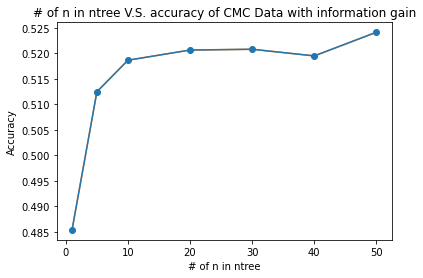

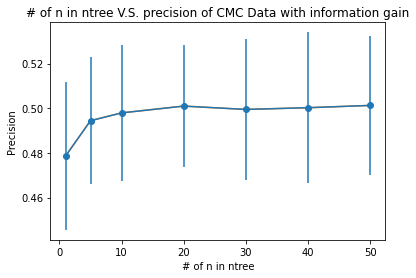

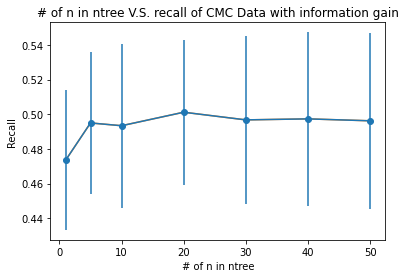

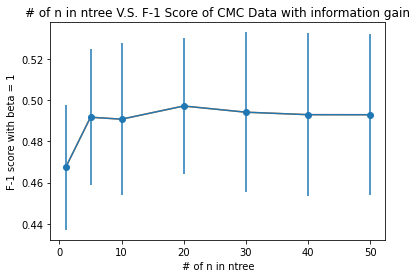

In [ ]:
ploter(cmcaccuracy, '# of n in ntree V.S. accuracy of CMC Data with information gain', '# of n in ntree', 'Accuracy')
ploter(cmcprecision, '# of n in ntree V.S. precision of CMC Data with information gain', '# of n in ntree', 'Precision', cmcprecisionstd)
ploter(cmcrecall, '# of n in ntree V.S. recall of CMC Data with information gain', '# of n in ntree', 'Recall', cmcrecallstd)
ploter(cmcf1, '# of n in ntree V.S. F-1 Score of CMC Data with information gain', '# of n in ntree', 'F-1 score with beta = 1', cmcf1std)

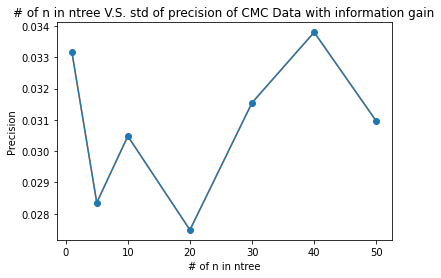

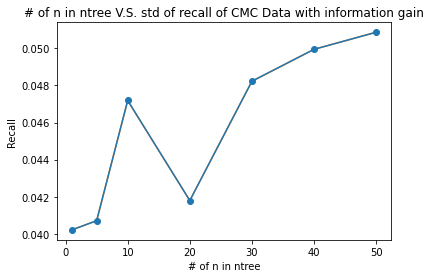

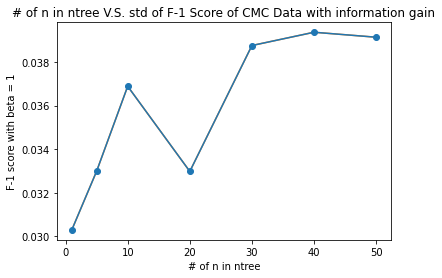

In [ ]:
ploter(cmcprecisionstd, '# of n in ntree V.S. std of precision of CMC Data with information gain', '# of n in ntree', 'Precision')
ploter(cmcrecallstd, '# of n in ntree V.S. std of recall of CMC Data with information gain', '# of n in ntree', 'Recall')
ploter(cmcf1std, '# of n in ntree V.S. std of F-1 Score of CMC Data with information gain', '# of n in ntree', 'F-1 score with beta = 1')

The result is kind of weird. with max accuracy around 52-53%, I tried to modified all the parameters, like maxdepth to 5 and so, but that only helps me to improve from 50% to 52%..

### IV. Appendix: Code

##### 1. evaluationmatrix.py

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

def accuracy(truePosi, trueNega, falsePosi, falseNega): # Count of all four
	return (truePosi+trueNega)/(truePosi+trueNega+falseNega+falsePosi)

def precision(truePosi, trueNega, falsePosi, falseNega):
	if (truePosi+falsePosi) == 0:
		return 0
	preposi = truePosi/(truePosi+falsePosi)
	# prenega = trueNega/(trueNega+falseNega)
	return preposi

def recall(truePosi, trueNega, falsePosi, falseNega):
	if (truePosi+falseNega)== 0:
		return 0
	recposi = truePosi/(truePosi+falseNega)
	# recnega = trueNega/(trueNega+falsePosi)
	return recposi

def fscore(truePosi, trueNega, falsePosi, falseNega, beta: 1):
	pre = precision(truePosi, trueNega, falsePosi, falseNega)
	rec = recall(truePosi, trueNega, falsePosi, falseNega)
	if (pre*(beta**2)+rec) == 0:
		return 0
	f = (1+beta**2)*((pre*rec)/(pre*(beta**2)+rec))
	return f

def evaluate(listsofoutput, positivelabel, beta=1):
    # list is list of [predicted, actual]
    listoftptnfpfn = []
    accuarcylists = []
    precisionlists = []
    recalllists = []
    fscorelists = []
    for output in listsofoutput:
        tp, tn, fp, fn, = 0, 0, 0, 0
        for i in range(len(output)):
            if output[i][0] == positivelabel and output[i][1] == positivelabel:
                tp += 1
            elif output[i][0] != positivelabel and output[i][0] == output[i][1]:
                tn += 1
            elif output[i][0] == positivelabel and output[i][1] != positivelabel:
                fp += 1
            elif output[i][0] != positivelabel and output[i][1] == positivelabel:
                fn += 1
        tptnfpfn = [tp, tn, fp, fn]
        listoftptnfpfn.append(tptnfpfn)
        accuarcylists.append(accuracy(tp, tn, fp, fn))
        precisionlists.append(precision(tp, tn, fp, fn))
        recalllists.append(recall(tp, tn, fp, fn))
        fscorelists.append(fscore(tp, tn, fp, fn, beta))
    return accuarcylists, precisionlists, recalllists, fscorelists, listoftptnfpfn

def meanevaluation(listsofoutput, positivelabel, beta=1):
    accuarcylists, precisionlists, recalllists, fscorelists, notused = evaluate(listsofoutput, positivelabel, beta)
    return sum(accuarcylists)/len(accuarcylists), sum(precisionlists)/len(precisionlists), sum(recalllists)/len(recalllists), sum(fscorelists)/len(fscorelists)

def markdownaprf(acc,pre,rec,fsc,beta,nvalue,title):
    acc, pre, rec, fsc = round(acc,3), round(pre,3), round(rec,3), round(fsc,3)
    display(Markdown(rf"""
	Result/Stat of {nvalue} trees random forest of {title}:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta={beta}** |
    | :---: | :---: | :---: | :---: |
    |{acc} | {pre} | {rec} | {fsc} |
    """))

def markdownmatrix(tptnfpfn,title):
    tp, tn, fp, fn = tptnfpfn[0], tptnfpfn[1], tptnfpfn[2], tptnfpfn[3]
    display(Markdown(rf"""
    Confusion Matrix: {title}
    |  | **Predicted +** | **Predicted-** |
    | :--- | :--- | :--- |
    | **Actual +** | {tp} | {fp} |
    | **Actual -** | {fn} | {tn} |
    """))

def confusionmatrix(truePosi, trueNega, falsePosi, falseNega, title=""):
	fig = plt.figure()
	plt.title(title)
	col_labels = ['Predict:+', 'Predict:-']
	row_labels = ['Real:+', 'Real:-']
	table_vals = [[truePosi, falseNega], [falsePosi, trueNega]]
	the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 3,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
	the_table.auto_set_font_size(False)
	the_table.set_fontsize(24)
	the_table.scale(4, 4)
	plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
	plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)

	for pos in ['right','top','bottom','left']:
		plt.gca().spines[pos].set_visible(False)

	plt.show()	
	return 


##### 2. utils.py

In [ ]:
from sqlite3 import Row
from evaluationmatrix import *
from sklearn import datasets
import random
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
from collections import Counter

def importfile(name:str,delimit:str):
    # importfile('hw3_wine.csv', '\t')
    file = open("datasets/"+name, encoding='utf-8-sig')
    reader = csv.reader(file, delimiter=delimit)
    dataset = []
    for row in reader:
        dataset.append(row)
    file.close()
    return dataset

def same(attributecolumn):
    return all(item == attributecolumn[0] for item in attributecolumn)

def majority(attributecolumn):
    return np.argmax(np.bincount(attributecolumn.astype(int)))

def entropy(attributecol):
    values = list(Counter(attributecol).values())
    ent = 0
    for value in values:
        k = (value/sum(values))
        ent += -k*math.log(k,2)
    return ent

def gini(attributecol):
    values = list(Counter(attributecol).values())
    ginivalue = 1
    for value in values:
        prob = (value/sum(values))
        ginivalue -= prob**2
    return ginivalue

def dropbyindex(data, category, listindex):
    newdata = np.delete(data.T, listindex).T
    keytoremove = [list(category.keys())[i] for i in listindex]
    newcategory = category.copy()
    [newcategory.pop(key) for key in keytoremove]
    return newdata, newcategory

def id3bestseperate(dataset, attributes:dict):
    # dataset in is the dataset by row. 
    # attributes is the dictionary of attributes:type 
    # types: numerical, categorical, binary.
    datasetbycolumn = dataset.T
    classindex = list(attributes.values()).index("class")
    originalentrophy = entropy(datasetbycolumn[classindex])
    smallestentrophy = originalentrophy
    thresholdvalue = -1

    i = 0
    bestattribute = {list(attributes.keys())[i]:attributes[list(attributes.keys())[i]]}
    attributesinuse = list(attributes.keys())[1:] if (classindex == 0) else list(attributes.keys())[:classindex]
    # datasetinuse = datasetbycolumn[1:] if (classindex == 0) else datasetbycolumn[:classindex]

    for attribute in attributesinuse:
        idx = i+1 if classindex == 0 else i

        if attributes[attribute] == "categorical" or attributes[attribute] == "binary":
            listofkeys = list(Counter(datasetbycolumn[idx]).keys())
            listofcategory = [] # this is the list of categorical values.
            
            for key in listofkeys:
                indexlist = [idex for idex, element in enumerate(datasetbycolumn[idx]) if element == key]
                category = np.array(datasetbycolumn[classindex][indexlist])
                listofcategory.append(category)

            entropynow = 0

            for ctgry in listofcategory:
                a = len(ctgry)/len(datasetbycolumn[idx]) # This is probability
                entropynow += a * entropy(ctgry)

            if entropynow < smallestentrophy:
                smallestentrophy = entropynow
                bestattribute = {attribute:attributes[attribute]}
            
        elif attributes[attribute] == "numerical":
            datasetsort = datasetbycolumn.T[datasetbycolumn.T[:,idx].argsort(kind='quicksort')].T
            currentthreshold = (datasetsort[idx][1]+datasetsort[idx][0])/2
            k = 1
            while k < len(datasetsort.T):
                currentthreshold = (datasetsort[idx][k]+datasetsort[idx][k-1])/2
                listofcategory = [datasetsort[classindex][:k],datasetsort[classindex][k:]]
                entropynow = 0

                for ctgry in listofcategory:
                    a = len(ctgry)/len(datasetbycolumn[idx]) # This is probability
                    entropynow += a * entropy(ctgry)

                if entropynow < smallestentrophy:
                    smallestentrophy = entropynow
                    thresholdvalue = currentthreshold
                    bestattribute = {attribute:attributes[attribute]}    
                k += 1
        i += 1

    gain = originalentrophy-smallestentrophy
    # set first attribution dictionary {key:type} to the best attributes.
    return bestattribute, thresholdvalue, gain

def cartbestseperate(dataset, attributes:dict):
    # dataset in is the dataset by row. 
    # attributes is the dictionary of attributes:type 
    # types: numerical, categorical, binary.
    datasetbycolumn = dataset.T
    classindex = list(attributes.values()).index("class")
    originalgini = gini(datasetbycolumn[classindex])
    smallestgini = originalgini
    thresholdvalue = -1

    i = 0
    bestattribute = {list(attributes.keys())[i]:attributes[list(attributes.keys())[i]]}
    attributesinuse = list(attributes.keys())[1:] if (classindex == 0) else list(attributes.keys())[:classindex]
    # datasetinuse = datasetbycolumn[1:] if (classindex == 0) else datasetbycolumn[:classindex]

    for attribute in attributesinuse:
        idx = i+1 if classindex == 0 else i

        if attributes[attribute] == "categorical" or attributes[attribute] == "binary":
            listofkeys = list(Counter(datasetbycolumn[idx]).keys())
            listofcategory = [] # this is the list of categorical values.
            
            for key in listofkeys:
                indexlist = [idex for idex, element in enumerate(datasetbycolumn[idx]) if element == key]
                category = np.array(datasetbycolumn[classindex][indexlist])
                listofcategory.append(category)

            currentgini = 0

            for ctgry in listofcategory:
                a = len(ctgry)/len(datasetbycolumn[idx]) # This is probability
                currentgini += a * gini(ctgry)

            if currentgini < smallestgini:
                smallestgini = currentgini
                bestattribute = {attribute:attributes[attribute]}
            
        elif attributes[attribute] == "numerical":
            datasetsort = datasetbycolumn.T[datasetbycolumn.T[:,idx].argsort(kind='quicksort')].T
            currentthreshold = (datasetsort[idx][1]+datasetsort[idx][0])/2
            k = 1
            while k < len(datasetsort.T):
                currentthreshold = (datasetsort[idx][k]+datasetsort[idx][k-1])/2
                listofcategory = [datasetsort[classindex][:k],datasetsort[classindex][k:]]
                currentgini = 0

                for ctgry in listofcategory:
                    a = len(ctgry)/len(datasetbycolumn[idx]) # This is probability
                    currentgini += a * gini(ctgry)

                if currentgini < smallestgini:
                    smallestgini = currentgini
                    thresholdvalue = currentthreshold
                    bestattribute = {attribute:attributes[attribute]}    
                k += 1
        i += 1

    # set first attribution dictionary {key:type} to the best attributes.
    gain = originalgini-smallestgini
    return bestattribute, thresholdvalue, gain


##### 3. decisiontree.py

In [ ]:
import sklearn.model_selection
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
import random
from collections import Counter
from utils import *

class Treenode:
    type = ""
    datatype = ""
    label = None
    testattribute = ""
    edge = {}
    majority = -1
    threshold = -1 # for numerical value
    testattributedict = {}
    depth = 0
    _caldepth = 0

    parent = None

    def __init__(self, label, type):
        self.label = label
        self.type = type
        # self.left = left
        # self.right = right

    def caldepth(self):
        a = self
        while a.parent is not None:
            self._caldepth += 1
            a = a.parent
        return self._caldepth
    
    def isfather(self):
        if self.parent is None:
            return True
        else:
            return False
    

# Decision Tree that only analyze square root of the data.
def decisiontreeforest(dataset: np.array, dictattributes: dict, algortype: str ='id3', maxdepth: int = 10, minimalsize: int = 10, minimalgain: float = 0.01):
    datasetcopy = np.copy(dataset).T # dataset copy is by colomn. 
    dictattricopy = dictattributes.copy()
    classindex = list(dictattributes.values()).index("class")
    k = len(dictattributes)-1
    randomlist = random.sample(range(0, k), round(math.sqrt(k))) if classindex !=0 else random.sample(range(1, k+1), round(math.sqrt(k)))
    randomlist.append(classindex)
    randomkey = [list(dictattricopy.keys())[i] for i in randomlist]
    trimmeddict = {key:dictattricopy[key] for key in randomkey}
    trimmeddata = np.array(datasetcopy[randomlist])

    def processbest(algor):
        if algor == "cart" or algor == "gini":
            return cartbestseperate(trimmeddata.T, trimmeddict)
        else: # algor == "id3" or algor == "infogain"
            return id3bestseperate(trimmeddata.T, trimmeddict)

    node = Treenode(label=-1,type="decision")
    currentdepth = node.depth

    node.majority = majority(datasetcopy[classindex])

    if same(datasetcopy[classindex]):
        node.type = "leaf"
        node.label = datasetcopy[classindex][0]
        return node
    
    if len(dictattricopy) == 0:
        node.type = "leaf"
        node.label = majority(datasetcopy[classindex])
        return node

    # A stopping criteria  'minimal_size_for_split_criterion'

    if len(dataset) <= minimalsize:
        node.type = "leaf"
        node.label = majority(datasetcopy[classindex])
        return node

    bestattributedict,thresholdval,gain = processbest(algortype)
    bestattributename = list(bestattributedict.keys())[0]
    bestattributetype = bestattributedict[bestattributename]
    node.testattributedict = bestattributedict
    node.datatype = bestattributetype
    node.testattribute = bestattributename
    node.threshold = thresholdval
    bindex = list(dictattricopy.keys()).index(list(bestattributedict.keys())[0])

    # A Possible Stopping criteria 'minimal_gain'

    if gain < minimalgain:
        node.type = "leaf"
        node.label = majority(datasetcopy[classindex])
        return node

    subdatalists = []
    if bestattributetype == "numerical":
        sortedcopy = datasetcopy.T[datasetcopy.T[:,bindex].argsort(kind='quicksort')].T
        splitindex = 0
        for numericalvalue in sortedcopy[bindex]:
            if numericalvalue > thresholdval:
                break
            else:
                splitindex += 1
        subdatalistraw = [sortedcopy.T[:splitindex].T,sortedcopy.T[splitindex:].T]
        for subdata in subdatalistraw:
            subdata = np.delete(subdata,bindex,0)
            subdatalists.append(subdata.T)
    else:
        bigv = list(Counter(datasetcopy[bindex]).keys()) # this is the all the categories of the test attribute left.
    
        for smallv in bigv:
            index = [idx for idx, element in enumerate(datasetcopy[bindex]) if element == smallv]
            subdatav = np.array(datasetcopy.T[index]).T
            subdatav = np.delete(subdatav,bindex,0)  # I delete the column I already used using bindex as reference. 
            # Then, later, pop the same index from list attribute.
            subdatalists.append(subdatav.T) # list of nparrays of target/label/categories.

    dictattricopy.pop(bestattributename)
    
    edge = {}
    sdindex = 0
    for subvdata in subdatalists:

        if subvdata.size == 0:
            node.type = "leaf"
            node.label = node.majority
            node.threshold = thresholdval
            return node

        # Another Stoping criteria I could ADD: maximal depth
        
        if node.caldepth()+1 > maxdepth:  
            node.type = "leaf"
            node.label = node.majority
            node.threshold = thresholdval
            return node 

        subtree = decisiontreeforest(subvdata, dictattricopy, algortype, maxdepth, minimalsize, minimalgain)
        subtree.depth = currentdepth + 1
        subtree.parent = node
            
        if bestattributetype == 'numerical':
            attributevalue = "<=" if sdindex == 0 else ">"
        else:
            attributevalue = bigv[sdindex]

        edge[attributevalue] = subtree
        sdindex += 1

    node.edge = edge

    return node

# Predict the label of the test data, return correct and predict.
def prediction(tree: Treenode, instance, dictattricopy): # note that the instance is by row. (I formerly used by column)
    predict = tree.majority
    classindex = list(dictattricopy.values()).index("class")
    correct = instance[classindex]
    if tree.type == 'leaf':
        predict = tree.label
        return predict, correct, predict==correct

    testindex = list(dictattricopy.keys()).index(tree.testattribute)
    
    if tree.datatype == "numerical":
        if instance[testindex] <= tree.threshold:
            nexttree = tree.edge['<=']
        else:
            nexttree = tree.edge['>']
    else:
        if instance[testindex] not in tree.edge:
            return predict, correct, predict==correct
            
        nexttree = tree.edge[instance[testindex]]

    return prediction(nexttree, instance, dictattricopy)

##### 4. randomforest.py

In [ ]:
from utils import *
from decisiontree import *

# Stratified K-Fold method
def stratifiedkfold(data, categorydict, k = 10):
    classindex = list(categorydict.values()).index("class")
    datacopy = np.copy(data).T
    classes = list(Counter(datacopy[classindex]).keys())
    nclass = len(classes) # number of classes
    listofclasses = []

    for oneclass in classes:
        index = [idx for idx, element in enumerate(datacopy[classindex]) if element == oneclass]
        oneclassdata = np.array(datacopy.T[index])
        np.random.shuffle(oneclassdata)
        listofclasses.append(oneclassdata)

    splitted = [np.array_split(i, k) for i in listofclasses]
    nclass = len(classes)
    combined = []

    for j in range(k):
        ithterm = []
        for i in range(nclass):
            if len(ithterm) == 0:
                ithterm = splitted[i][j]
            else:
                ithterm = np.append(ithterm,splitted[i][j],0)
        combined.append(ithterm)
    
    return combined

# Bootstrap/Bagging method with resample ratio
def bootstrap(data, ratio=0.1): 
    data2 = np.copy(data)
    k = len(data)
    randomlist = random.sample(range(0, k), round(k*ratio))
    data2 = np.delete(data2, randomlist, 0)
    p = len(data2)
    randomfill = random.sample(range(0, p), k-p)
    data2 = np.concatenate((data2,data2[randomfill]),0)
    # print(len(data2))
    return data2

# Random Forest, plant a forest of n trees
def plantforest(data, categorydict, ntree=10, maxdepth=10, minimalsize=10, minimalgain=0.01, algortype='id3', bootstrapratio = 0.1):
    forest = []
    for i in range(ntree):
        datause = bootstrap(data, bootstrapratio)
        tree = decisiontreeforest(datause,categorydict,algortype,maxdepth,minimalsize,minimalgain)
        forest.append(tree)
    return forest

# Predict the class of a single instance
def forestvote(forest, instance, categorydict):
    votes = {}
    for tree in forest:
        predict, correct, correctbool = prediction(tree,instance,categorydict)
        if predict not in votes:
            votes[predict] = 1
        else:
            votes[predict] += 1
    return max(votes, key=votes.get), correct

# A complete k-fold cross validation
def kfoldcrossvalid(data, categorydict, k=10, ntree=10, maxdepth=5, minimalsize=10, minimalgain=0.01, algortype='id3', bootstrapratio = 0.1):
    folded = stratifiedkfold(data, categorydict, k)
    listofnd = []
    accuracylist = []
    for i in range(k):
        # print("at fold", i)
        testdataset = folded[i]
        foldedcopy = folded.copy()
        foldedcopy.pop(i)
        traindataset = np.vstack(foldedcopy) 
        correctcount = 0
        trainforest = plantforest(traindataset,categorydict,ntree,maxdepth,minimalsize,minimalgain,algortype,bootstrapratio)
        emptyanalysis = []
        # testdataset = traindataset
        for instance in testdataset:
            predict, correct = forestvote(trainforest,instance,categorydict)
            emptyanalysis.append([predict, correct])
            if predict == correct:
                correctcount += 1
        listofnd.append(np.array(emptyanalysis))
        # print('fold', i+1, ' accuracy: ', correctcount/len(testdataset))
        accuracylist.append(correctcount/len(testdataset))
    acc = np.mean(accuracylist)
    return listofnd, acc

##### 5. run.py

In [ ]:
from utils import *
from decisiontree import *
from randomforest import *

def importhousedata():
    house = importfile('hw3_house_votes_84.csv', ',')
    housecategory = {}
    for i in house[0]:
        housecategory[i] = 'categorical'
    housecategory["class"] = 'class'
    housedata = np.array(house[1:]).astype(float)
    return housedata, housecategory

def importwinedata():
    wine = importfile('hw3_wine.csv', '\t')
    winecategory = {}
    for i in wine[0]:
        winecategory[i] = 'numerical'
    winecategory["# class"] = 'class'
    winedata = np.array(wine[1:]).astype(float)
    return winedata, winecategory

def importcancerdata():
    cancer = importfile('hw3_cancer.csv', '\t')
    cancercategory = {}
    for i in cancer[0]:
        cancercategory[i] = 'numerical'
    cancercategory["Class"] = 'class'
    cancerdata = np.array(cancer[1:]).astype(float)
    return cancerdata, cancercategory

def importcmcdata():
    cmc = importfile('cmc.data', ',')
    cmccategory = {"Wife's age":"numerical","Wife's education":"categorical",
    "Husband's education":"categorical","Number of children ever born":"numerical",
    "Wife's religion":"binary","Wife's now working?":"binary",
    "Husband's occupation":"categorical","Standard-of-living index":"categorical",
    "Media exposure":"binary","Contraceptive method used":"class"}
    cmcdata = np.array(cmc).astype(int)
    return cmcdata, cmccategory


if __name__=="__main__":
    housedata, housecategory = importhousedata()
    winedata, winecategory = importwinedata()
    cancerdata, cancercategory = importcancerdata()
    cmcdata,cmccategory = importcmcdata()

    lists,acc = kfoldcrossvalid(cancerdata, cancercategory, k=10, ntree=20, maxdepth=10, minimalsize=10, minimalgain=0.01, algortype='id3', bootstrapratio = 0.1)
    print(acc)
    print(lists)

0.9599562592948999
[array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1.,